### Matplotlib

Es uno de los módulos mas usados para realizar gráficos. Posee dos enfoques diferentes, uno mas lineal y otro orientado a objetos. El primero posee una sintaxis similar a MATLAB y es mas adecuado para realizar gráficos en poco tiempo y con poca personalización, mientras que el segundo permite una mayor personalización de la presentación y manipulación de los datos.

#### Interfaz tipo MATLAB

Como todo módulo que querramos usar debemos importarlo al espacio de trabajo usando la palabra `import`. En este caso importaremos el sub-módulo `matplotlib.pytplot`y lo llamaremos `plt`. Usaremos la función `plot` con una serie de puntos para ver que sucede

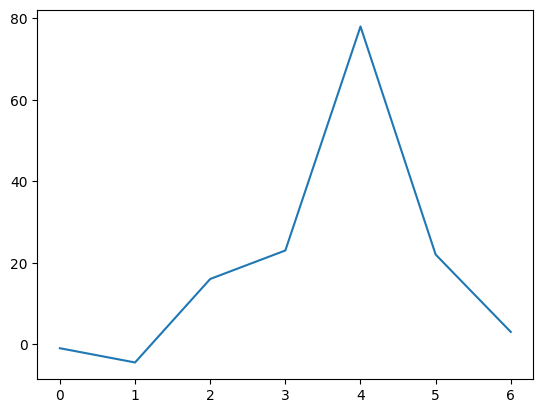

In [ ]:
import matplotlib.pyplot as plt

plt.plot([-1, -4.5, 16, 23, 78, 22, 3])
plt.show()

Si cambiamos algunos parámetros de la función `plot` podemos obtener lo siguiente

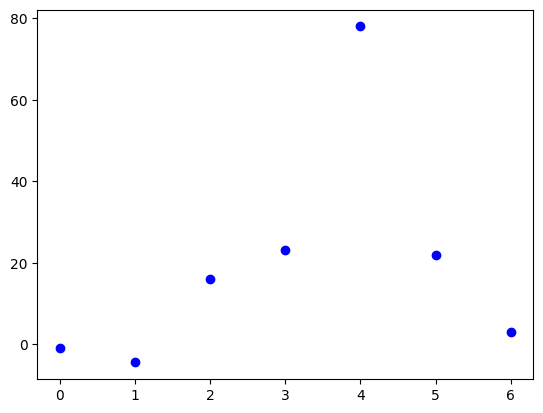

In [ ]:
plt.plot([-1, -4.5, 16, 23, 78, 22, 3], "ob")
plt.show()

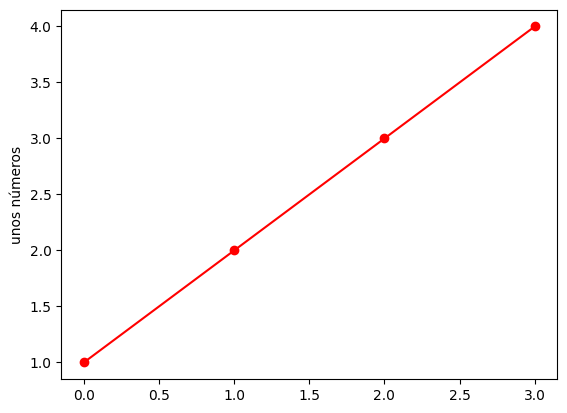

In [ ]:
plt.plot([1, 2, 3, 4], 'o-r')
plt.ylabel('unos números')
plt.show()

Los ejes pueden nombrarse (incluso usar LaTex dentro de ellos)

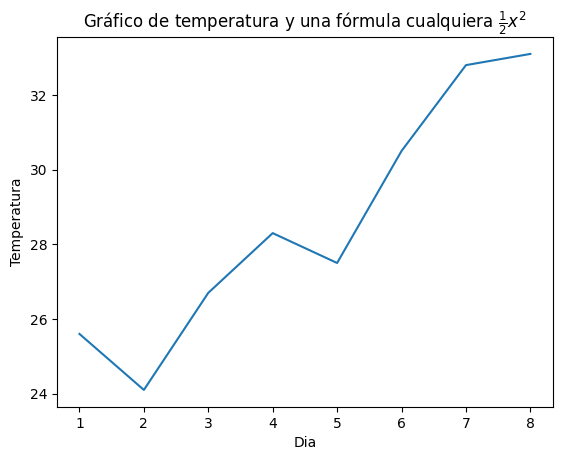

In [ ]:
dias = range(1, 9)
temperatura = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]

fig, ax = plt.subplots()
ax.plot(dias, temperatura)
ax.set(xlabel='Dia',
       ylabel='Temperatura',
       title='Gráfico de temperatura y una fórmula cualquiera $\\frac{1}{2}x^2$')
plt.show()

La personalización posible es total, desde la tipografía pasando por el grosor y tipo de línea, etc. No ahondaremos en esto más allad de lo necesario para la claridad de los gráficos que hagamos.

#### Interfaz orientada a objetos


En la interfaz orientada a objetos (no importa si no entendés que significa esto) la función ```pyplot``` se llama una sola vez, y luego se usa la estructura que se muestra debajo que permite un mayor grado de personalización y reutilización de los gráficos.

In [ ]:
fig, ax = plt.subplots()

En el apunte dedicado a Matplotlib, hay mas detalles sobre ésta sintaxis y sus posibilidades.

Se puede consultar más acerca de Matplotlib en [esta web](https://python-course.eu/numerical-programming/overview-of-matplotlib.php) y en el [sitio oficial de matplotlib](https://matplotlib.org/stable/index.html).
También tienen un apunte dedicado a Matplotlib con ejercicios en espacio de google de la materia.

### Scipy

El módulo Scipy es una colección de herramientas para el cálculo científico de amplio espectro. veremos algunas de sus posibilidades

#### Ajuste de curvas

Nos centraremos en unas [pocas funciones](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) de su vasto arsenal: aquellas que nos permiten obtener la expresión analítica que más se ajusta a un conjunto de datos discretos.

Es de suma importancia a la hora de ajustar los datos de una curva, tener una idea del modelo  físico al cual queremos ajustar nuestros datos. Es decir, la hipótesis teórica que el experimento debe validar es un a-priori que la experimentación validará (o no) y somos nosotros los experimentadores quienes debemos proveer el modelo al cual ajustar.

En términos matemáticos lo que optimize hace es es minimizar una función del tipo:

$$\sum_i (f(x_i,\beta) - y_i)^2$$

en donde $\beta$ son los parámetros que podemos variar, y $x_i$ y $y_i$ conforman los pares de valores obtenidos experimentalmente (suponemos el caso de una variable de entrada y una de salida por simplicidad en la notación)

El modulo a usar es `optimize` de la libreria `scipy` por lo que para importarlo haremos

``` python
from scipy import optmize as op

```

o alternativamente:


``` python
import scipy.optimize as sp

```

##### Ejemplo
Vamos a crear unos datos a partir del modelo teórico de una caída libre sin rozamiento. Debajo vemos como se filtra un array *y* para obtener los valores de altura mayores a cero y luego "rebanamos" el array *t* para que tenga la misma cantidad de elementos que el array de alturas, y luego hacemos un gráfico de dispersión (*scatter*) como si los datos hubieran sido obtenidos desde un experimento.
Está claro que estos datos van a ajustar "perfecto" al modelo teórico ya que lso datos fueron creados a paritr de éste.

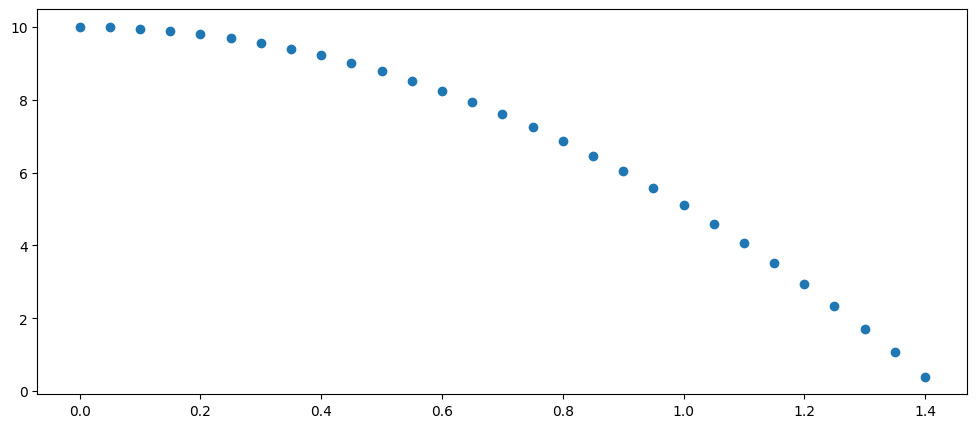

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,10,0.05)
y = -4.9*t**2+10
y0 = y[y > 0]
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
ax = ax.scatter(t[:len(y0)],y0)


Para ver más sobre como filtrar o rebanar un array pueden consultar [acá](https://www.statology.org/numpy-filter/) o  [acá](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp)

con nuestras habilidades de pandas, construyamos un archivo ficticio en base a estos datos, para luego "leerlo" y a partir de ahí usar el ajuste de curvas. Este paso no es necsario, ya que podemos usar los datos ya disponibles en los arrays, pero no viene mal la práctica

In [ ]:
import pandas as pd

df0 = pd.DataFrame([t[:len(y0)],y0])
# este array tiene dos filas y N columnas por lo que el dataframe no nos sirve
df = pd.DataFrame(np.array([t[:len(y0)],y0]).T, columns=['t','y'])
# si transponemos los datos queda en la forma correta y podemos agregar los nombres
# de los ejes

df.head() # para mirar los primeros datos
df.tail() # para mirar los ultimos datos

df.to_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Apuntes/ej_op.csv',index=False)
# la ruta para que funcione debe ser la que se haya montado en tu sesión de colab
# index=False hace que no exportemos la columna de los índices que genera pandas

In [ ]:
# otra opción para crear el dataframe es
# pasra como índices los nombres de las columnas y
# transponer el dataframe una vez creado
arr = np.array([t[:len(y0)],y0])
dfa = pd.DataFrame(arr,index=['t','y']).T

dfa.head()

,t,y
0,0.000,10.000000
1,0.015,9.998897
2,0.030,9.995590
3,0.045,9.990077
4,0.060,9.982360


In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Apuntes/ej_op.csv')

Tenemos que crear una función que contega la información del modelo. Como primer parámetro debe contener la variable dependiente y luego los parámetros

In [ ]:
def opti(x,a,b):
  """
  x: variable independiente
  a: parámetro de la aceleración
  b: parámetro de la altura inicial
  """
  return -0.5*a*x**2+b

In [ ]:
from scipy import optimize as op

In [ ]:
param_a, cov = op.curve_fit(opti,datos['t'],datos['y'])

print('aceleracion' , param_a[0],'m/s/s','\n','altura inicial',param_a[1],'m')

aceleracion 9.8 m/s/s 
 altura inicial 10.0 m


Podemos hacer un gráfico de los "datos" contra la curva con los parámetros obtenidos del ajuste



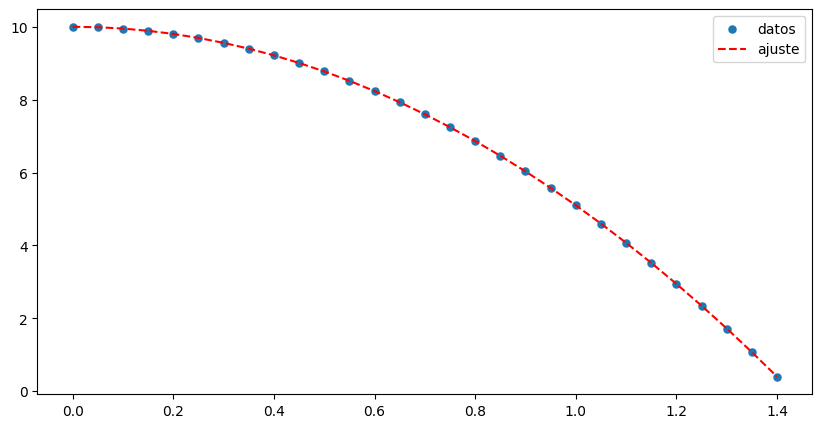

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
ax.scatter(datos['t'],datos['y'],label='datos',lw=0.1)
ax.plot(datos['t'],opti(datos['t'],param_a[0],param_a[1]),'--',label='ajuste',color='red')
ax.legend(loc='upper right')

Si quiséramos tener un caso que se vea mas "real" podemos hacer que los datos generados tengan un poco de "ruido"

aceleracion 9.800000000000002 m/s/s 
 altura inicial 9.559865513942757 m


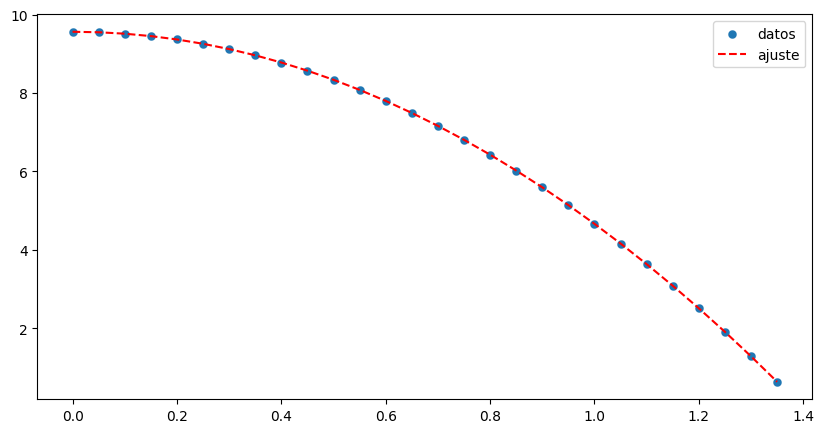

In [ ]:
ruido = np.random.randint(-1,2)*np.random.rand()
# agregamos un número aleatorio entre -1 y 1

t = np.arange(0,10,0.05)
y = -4.9*t**2+10 +ruido
y0 = y[y > 0]
#fig, ax = plt.subplots()
#fig.set_size_inches(12,5)
#ax = ax.scatter(t[:len(y0)],y0)

param_a, cov = op.curve_fit(opti,t[:len(y0)],y0)

fig,ax = plt.subplots()
fig.set_size_inches(10,5)
ax.scatter(t[:len(y0)],y0,label='datos',lw=0.1)
ax.plot(t[:len(y0)],opti(t[:len(y0)],param_a[0],param_a[1]),'--',label='ajuste',color='red')
ax.legend(loc='upper right')

print('aceleracion' , param_a[0],'m/s/s','\n','altura inicial',param_a[1],'m')

Si hacemos una gráfica de colores con la matriz de covarianza obtenemos una idea del "error" de cada parámetro. La interpretación de esta matriz escapa a lo que podemos ver en esta materia. La idea es que es una matriz cuadrada que relaciona todos los parámetros a los que ajustamos entre si. La diagonal es una medida del error de un parámetro específico las otras celdas son entre un parámetro y otro: es decir, la diagonal nos da una idea del error en un parámetro mientras que el resto nos indica como se influyen entre si los parámetros.

In [ ]:
print(np.diag(cov))

[9.78127213e-32 1.71503142e-32]


In [ ]:
print(cov)

[[9.78127213e-32 3.02608105e-32]
 [3.02608105e-32 1.71503142e-32]]


en nuestro caso los errores son muy pequeños porque los datos son generados a partir de un modelo teórico.

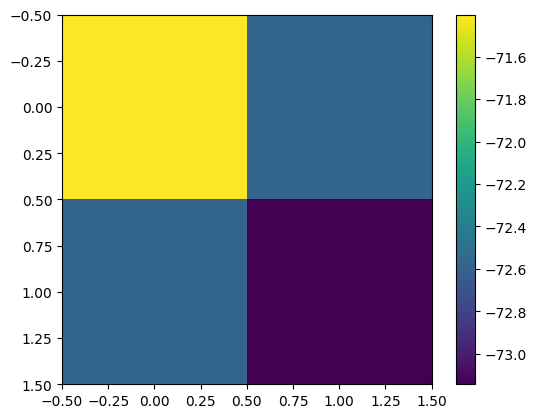

In [ ]:
plt.imshow(np.log(np.abs(cov)))
plt.colorbar()

#### Constantes físicas

Scipy también ofece a mano las [constantes físicas](https://docs.scipy.org/doc/scipy/reference/constants.html) mas usuales para que podamos usarla en nuestros cálculos.

In [ ]:
from scipy import constants

In [ ]:
print(constants.Boltzmann)

1.380649e-23


In [ ]:
constants? # para ver la ayuda el listado de constantes disponibles

In [ ]:
g = constants.g
print(g)

9.80665


In [ ]:
m_e = constants.m_e
print(m_e)

9.1093837015e-31


In [ ]:
constants.unit('electron mass') # ver las unidades

'kg'

In [ ]:
print(constants.yotta) # acceder a prefijos

1e+24


In [ ]:
k = constants.kilo

print(10*k)

10000.0


In [ ]:
constants.gram # Kg / g

0.001

In [ ]:
print(constants.kilogram_force) # Newtons / Kgf
print(constants.kgf)

9.80665
9.80665
